<a href="https://colab.research.google.com/github/cwangyal/Stock-Analysis-with-Baruch-AIS/blob/main/Financial_Stock_Data_Analysis_With_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install yfinance

In [317]:
import yfinance as yf   #acces data from yahoo
import pandas as pd     #dataframes
import numpy as np      #calculations
import datetime         #when working with dates

In [196]:
#for user interface
symbolA= input("Enter Ticker Symbol for stockA: ")
symbolB= input("Enter Ticker Symbol for stockB: ")

#user enters the start date of stock analysis
date_entry = input('Enter a start date in YYYY-MM-DD format: ')
year, month, day = map(int, date_entry.split('-'))
start = datetime.date(year, month, day)

#user enters the end date of stock analysis
date_entry = input('Enter an end date in YYYY-MM-DD format: ')
year, month, day = map(int, date_entry.split('-'))
end = datetime.date(year, month, day)

Enter Ticker Symbol for stockA: AMZN
Enter Ticker Symbol for stockB: META
Enter a start date in YYYY-MM-DD format: 2022-01-01
Enter an end date in YYYY-MM-DD format: 2023-01-01


In [197]:
#To import the data from Yahoo
AMZN = yf.download(symbolA, start, end)
META = yf.download(symbolB, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [211]:
#To explore the stock
#AMZN.head(7)
#AMZN.tail(5)
META.head(5)
#META.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,338.299988,341.079987,337.190002,338.540009,338.540009,14537900
2022-01-04,339.950012,343.089996,331.869995,336.529999,336.529999,15998000
2022-01-05,333.019989,335.760010,323.839996,324.170013,324.170013,20564500
2022-01-06,322.820007,339.170013,322.720001,332.459991,332.459991,27962800
2022-01-07,332.739990,337.000000,328.880005,331.790009,331.790009,14722000


In [220]:
#keeps the column that you want to analyze
META_ = META[["Adj Close"]]

In [ ]:
#are the missing values?
META_.isnull().sum()

In [ ]:
#to rename a column
META_.index
META_.rename(columns = {"Adj Close": "Adj_Close"}, inplace= True)

In [230]:
META_.head()

,Adj_Close
Date,
2022-01-03,338.540009
2022-01-04,336.529999
2022-01-05,324.170013
2022-01-06,332.459991
2022-01-07,331.790009


In [232]:
#to find the highest, lowest, and mean value in the Adj_Close
META_.Adj_Close.max()
#META_.Adj_Close.min()
#META_.Adj_Close.mean()


338.5400085449219

In [233]:
#create df for AMZN
AMZN_= AMZN[["Adj Close"]]
AMZN_.rename(columns = {"Adj Close": "Adj_Close"}, inplace = True)
AMZN_.head()

<ipython-input-233-e6d12b27030d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMZN_.rename(columns = {"Adj Close": "Adj_Close"}, inplace = True)


,Adj_Close
Date,
2022-01-03,170.404495
2022-01-04,167.522003
2022-01-05,164.356995
2022-01-06,163.253998
2022-01-07,162.554001


# **1. Create a trend analysis**


In [234]:
#ewm is the exponential weighted moving average, span = number of days
def trend_analysis(df):
    df['Weighted_Moving_Average'] = df['Adj_Close'].ewm(span=3, adjust=False).mean()
    df['Moving Average'] = df['Adj_Close'].rolling(window= 3).mean()

    return df

In [235]:
trend_analysis(META_)
trend_analysis(AMZN_)

<ipython-input-234-2cf5b25ae645>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted_Moving_Average'] = df['Adj_Close'].ewm(span=3, adjust=False).mean()
<ipython-input-234-2cf5b25ae645>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Moving Average'] = df['Adj_Close'].rolling(window= 3).mean()
<ipython-input-234-2cf5b25ae645>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,Adj_Close,Weighted_Moving_Average,Moving Average
Date,,,
2022-01-03,170.404495,170.404495,NaN
2022-01-04,167.522003,168.963249,NaN
2022-01-05,164.356995,166.660122,167.427831
2022-01-06,163.253998,164.957060,165.044332
2022-01-07,162.554001,163.755530,163.388331
...,...,...,...
2022-12-23,85.250000,85.174919,85.269999
2022-12-27,83.040001,84.107460,84.026667
2022-12-28,81.820000,82.963730,83.370000


In [241]:
META_.describe()

,Adj_Close,Weighted_Moving_Average,Moving Average
count,251.000000,251.000000,249.000000
mean,180.187690,181.060918,179.794887
std,56.658923,57.015050,55.594030
min,88.910004,91.146741,90.080002
25%,138.059998,138.395515,137.473333
50%,170.160004,170.301537,169.310003
75%,207.655006,207.394633,205.776667
max,338.540009,338.540009,333.080007


In [239]:
#we can see that it will be a downward trend
META

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,338.299988,341.079987,337.190002,338.540009,338.540009,14537900
2022-01-04,339.950012,343.089996,331.869995,336.529999,336.529999,15998000
2022-01-05,333.019989,335.760010,323.839996,324.170013,324.170013,20564500
2022-01-06,322.820007,339.170013,322.720001,332.459991,332.459991,27962800
2022-01-07,332.739990,337.000000,328.880005,331.790009,331.790009,14722000
...,...,...,...,...,...,...
2022-12-23,116.029999,118.180000,115.540001,118.040001,118.040001,17796600
2022-12-27,117.930000,118.599998,116.050003,116.879997,116.879997,21392300
2022-12-28,116.250000,118.150002,115.510002,115.620003,115.620003,19612500


In [240]:
#also a downward trend
AMZN

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000
2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000
2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000
2022-01-06,163.450500,164.800003,161.936996,163.253998,163.253998,51958000
2022-01-07,163.839005,165.243500,162.031006,162.554001,162.554001,46606000
...,...,...,...,...,...,...
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600


# **2. Risk Analysis**

In [246]:
#standard deviation for volatility
AMZN_.Adj_Close.std()

23.904315340462265

In [247]:
#create a function to compare the std
def risk_analysis(df1, df2):
  std_SymbolA= df1.Adj_Close.std()
  std_SymbolB= df2.Adj_Close.std()

  if std_SymbolA > std_SymbolB:
    print("Amazon stock is riskier than the Meta Stock")
  else:
    print("Meta stock is riskier than the Amazon Stock")

In [249]:
risk_analysis(AMZN_, META_)

Meta stock is riskier than the Amazon Stock


# **3. Return Analysis**

In [250]:
def daily_return_analysis(df):
  df["Daily_Returns"]= df["Adj_Close"].pct_change()

  return(df)

In [255]:
daily_return_analysis(AMZN_)
#daily_return_analysis(META_)

<ipython-input-250-a0fd42a7e8b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Daily_Returns"]= df["Adj_Close"].pct_change()


,Adj_Close,Weighted_Moving_Average,Moving Average,Daily_Returns
Date,,,,
2022-01-03,170.404495,170.404495,NaN,NaN
2022-01-04,167.522003,168.963249,NaN,-0.016916
2022-01-05,164.356995,166.660122,167.427831,-0.018893
2022-01-06,163.253998,164.957060,165.044332,-0.006711
2022-01-07,162.554001,163.755530,163.388331,-0.004288
...,...,...,...,...
2022-12-23,85.250000,85.174919,85.269999,0.017425
2022-12-27,83.040001,84.107460,84.026667,-0.025924
2022-12-28,81.820000,82.963730,83.370000,-0.014692


In [258]:
# Calculate monthly returns for TSLA
AMZN_Monthly_Return = AMZN["Adj Close"].resample("M").ffill().pct_change()[1:]

# Calculate monthly returns for AAPL
META_Monthly_Return = META["Adj Close"].resample("M").ffill().pct_change()[1:]


In [260]:
AMZN_Monthly_Return

Date
2022-02-28    0.026673
2022-03-31    0.061437
2022-04-30   -0.237525
2022-05-31   -0.032764
2022-06-30   -0.116459
2022-07-31    0.270596
2022-08-31   -0.060615
2022-09-30   -0.108622
2022-10-31   -0.093451
2022-11-30   -0.057595
2022-12-31   -0.129894
Freq: M, Name: Adj Close, dtype: float64

# **4. Data Vizualization**

In [261]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

In [302]:
def plot_trend(df):
  plt.style.use('ggplot')

  plt.figure(figsize = (12,6))

  plt.plot(df['Weighted_Moving_Average'], label='Weighted_Moving_Average',linestyle='--', linewidth = 2)
  plt.plot(df['Moving Average'], label='Moving_Average',linestyle='-.', linewidth = 2)


  plt.xlabel('Date')
  plt.ylabel('Adjusted closing price ($)')
  plt.title('Trend Analysis')
  plt.legend()

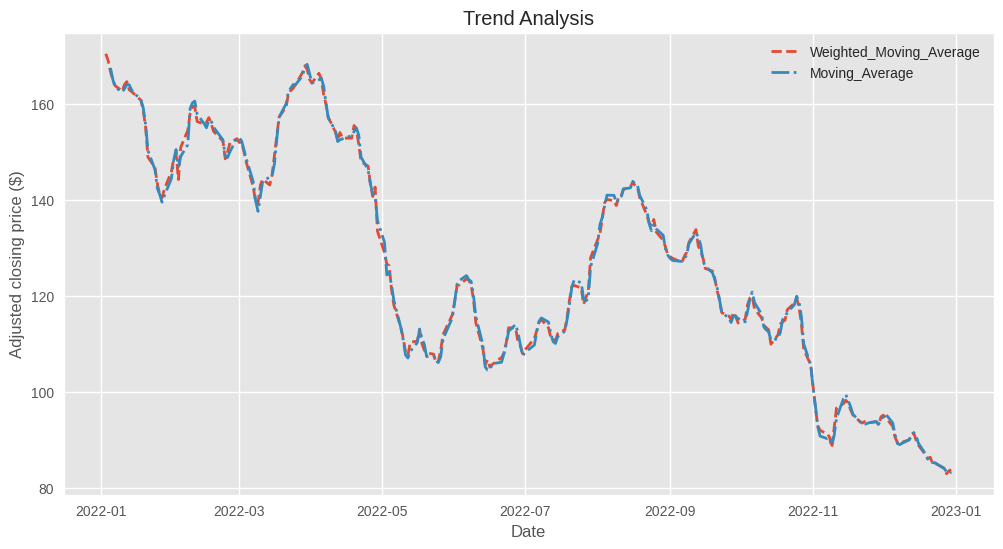

In [303]:
plot_trend(AMZN_)

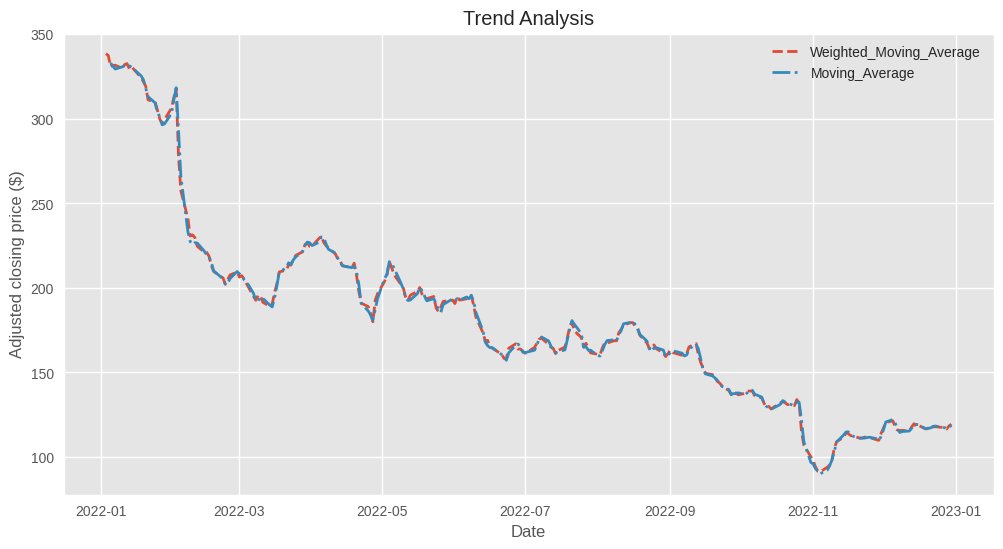

In [304]:
plot_trend(META_)

**We can see that the weighted moving average and moving average are very similar to each other for both stocks.**

In [309]:
def plot_daily_return(df1,df2):
  plt.style.use('ggplot')

  plt.figure(figsize = (12,6))

  plt.plot(df1['Daily_Returns'], label='Daily Return AMZN',linestyle='--', linewidth = 2, color = 'r')
  plt.plot(df2['Daily_Returns'], label='Daily Return META',linestyle='-', linewidth = 2, color = 'b')

  plt.xlabel('Date')
  plt.ylabel('Daily Returns')
  plt.title('Daily Return Analysis')
  plt.legend()


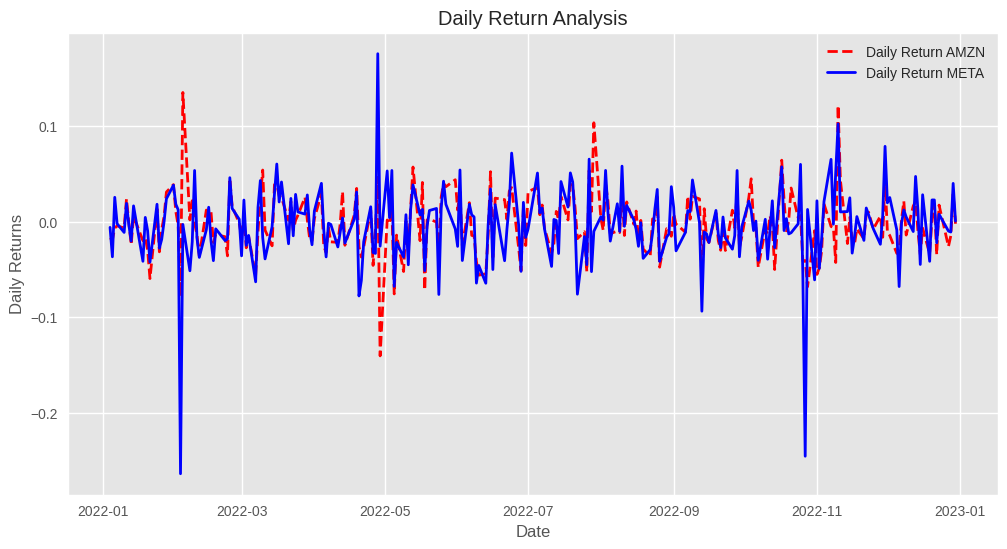

In [310]:
plot_daily_return(AMZN_, META_)

In [315]:
def plot_monthly_renturns(df1,df2):
  plt.style.use('ggplot')

  plt.figure(figsize = (12,6))

  plt.plot(df1["Adj_Close"].resample('M').ffill().pct_change()[1:],label='Monthly Returns AMZN', linestyle='--', linewidth = 2, color = 'r')
  plt.plot(df2["Adj_Close"].resample('M').ffill().pct_change()[1:],label='Monthly Returns META', linestyle='-', linewidth = 2, color = 'b')

  plt.xlabel('Date')
  plt.ylabel;('Monthly Returns (%)')
  plt.title('Monthly Return Analysis AAPL & TSLA')
  plt.show()

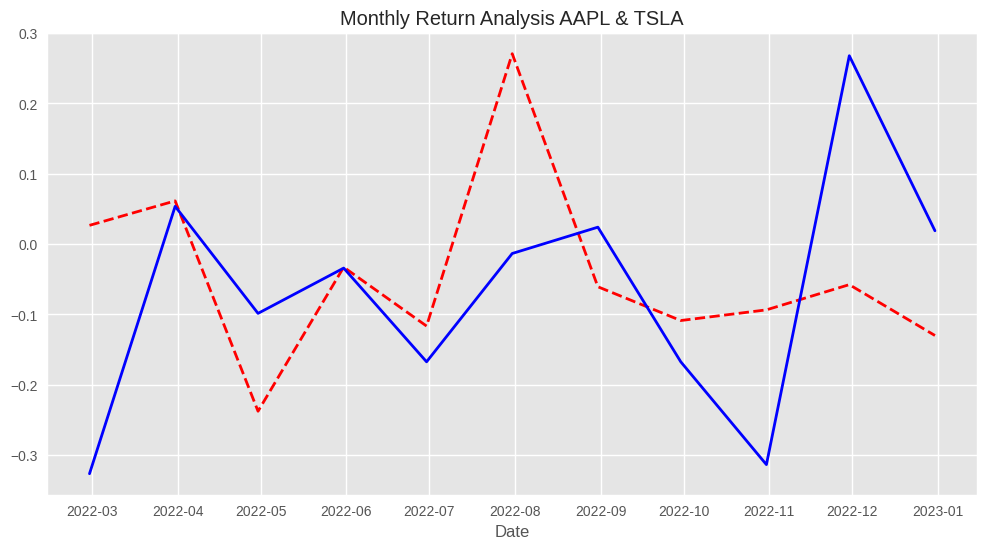

In [316]:
plot_monthly_renturns (AMZN_, META_)